# **Computational Drug Discovery with Machine Learning to Identify New Drug Candidates for Chronic Kidney Disease**


### **Adesanmi Dayo PraiseGod**  [**CSC/2018/1172**]


## 1. Data Collection

### **Dataset was gotten from (ChEMBL Database)**

The [*ChEMBL Database*](https://www.ebi.ac.uk/chembl/) is a manually curated database of bioactive molecules with drug-like properties. It brings together chemical, bioactivity, and genomic data to aid the translation of genomic information into effective new drugs.

### Installing libraries

Install necessary libraries and the ChEMBL web service to retrieve bioactivity data from the ChEMBL Database.

In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install chembl-webresource-client
!pip install rdkit

!pip list

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 23.1.0
    Uninstalling attrs-23.1.0:
      Successfully uninstalled attrs-23.1.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 70.0 MB/s eta 0:00:00
Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.4
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.2.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      21.3.0
argon2-cffi-bindings             21.2.0
array-record                     0.4.0
arviz                            0.15.1
astropy                          5.2.2
a

### Importing libraries

In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import ChEMBL web service
from chembl_webresource_client.new_client import new_client

### Target Protein search for kidney

In [3]:
# Target search for coronavirus
target = new_client.target
target_query = target.search('kidney')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Mus musculus,Kidney,17.0,False,CHEMBL613579,[],TISSUE,10090
1,[],Rattus norvegicus,Kidney,17.0,False,CHEMBL613638,[],TISSUE,10116
2,[],Mus musculus,"Glutaminase kidney isoform, mitochondrial",15.0,False,CHEMBL4523110,"[{'accession': 'D3Z7P3', 'component_descriptio...",SINGLE PROTEIN,10090
3,[],Homo sapiens,"Glutaminase kidney isoform, mitochondrial",14.0,False,CHEMBL2146302,"[{'accession': 'O94925', 'component_descriptio...",SINGLE PROTEIN,9606
4,[],Rattus norvegicus,"Glutaminase kidney isoform, mitochondrial",14.0,False,CHEMBL4523186,"[{'accession': 'P13264', 'component_descriptio...",SINGLE PROTEIN,10116
...,...,...,...,...,...,...,...,...,...
74,[],Mus musculus,Oxytocin receptor,3.0,False,CHEMBL3243907,"[{'accession': 'P97926', 'component_descriptio...",SINGLE PROTEIN,10090
75,[],Gallus gallus,Oxytocin-like receptor,3.0,False,CHEMBL3243915,"[{'accession': 'Q5D7U5', 'component_descriptio...",SINGLE PROTEIN,9031
76,[],Mus musculus,Vasopressin V1a receptor,3.0,False,CHEMBL3414410,"[{'accession': 'Q62463', 'component_descriptio...",SINGLE PROTEIN,10090
77,[],Homo sapiens,Vasopressin V1a/V2,3.0,False,CHEMBL4523980,"[{'accession': 'P30518', 'component_descriptio...",SELECTIVITY GROUP,9606


### Select and retrieve bioactivity data for *Glutaminase kidney isoform, mitochondrial* (3rd entry)

In [4]:
selected_target = targets.target_chembl_id[3]
selected_target

'CHEMBL2146302'

Only bioactivity data for **Glutaminase kidney isoform, mitochondrial (CHEMBL3217)** that are reported as pChEMBL values. Using the standart type of **IC50**.

In [5]:
activity = new_client.activity
result = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [6]:
df = pd.DataFrame.from_dict(result)
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,12142692,[],CHEMBL2189067,Inhibition of human kidney glutaminase (124 to...,B,None,None,BAO_0000190,...,Homo sapiens,"Glutaminase kidney isoform, mitochondrial",9606,None,None,IC50,uM,UO_0000065,None,100.0
1,None,None,12142693,[],CHEMBL2189067,Inhibition of human kidney glutaminase (124 to...,B,None,None,BAO_0000190,...,Homo sapiens,"Glutaminase kidney isoform, mitochondrial",9606,None,None,IC50,uM,UO_0000065,None,48.0
2,None,None,12142694,[],CHEMBL2189067,Inhibition of human kidney glutaminase (124 to...,B,None,None,BAO_0000190,...,Homo sapiens,"Glutaminase kidney isoform, mitochondrial",9606,None,None,IC50,uM,UO_0000065,None,100.0
3,None,None,12142695,[],CHEMBL2189067,Inhibition of human kidney glutaminase (124 to...,B,None,None,BAO_0000190,...,Homo sapiens,"Glutaminase kidney isoform, mitochondrial",9606,None,None,IC50,uM,UO_0000065,None,5.2
4,None,None,12142696,[],CHEMBL2189067,Inhibition of human kidney glutaminase (124 to...,B,None,None,BAO_0000190,...,Homo sapiens,"Glutaminase kidney isoform, mitochondrial",9606,None,None,IC50,uM,UO_0000065,None,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165,{'action_type': 'NEGATIVE ALLOSTERIC MODULATOR...,None,24916919,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5164961,Allosteric inhibition of human GLS1 using glut...,B,None,None,BAO_0000190,...,Homo sapiens,"Glutaminase kidney isoform, mitochondrial",9606,None,None,IC50,nM,UO_0000065,None,4.85
1166,{'action_type': 'NEGATIVE ALLOSTERIC MODULATOR...,None,24916920,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5164961,Allosteric inhibition of human GLS1 using glut...,B,None,None,BAO_0000190,...,Homo sapiens,"Glutaminase kidney isoform, mitochondrial",9606,None,None,IC50,nM,UO_0000065,None,23.69
1167,{'action_type': 'NEGATIVE ALLOSTERIC MODULATOR...,None,24916921,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5164961,Allosteric inhibition of human GLS1 using glut...,B,None,None,BAO_0000190,...,Homo sapiens,"Glutaminase kidney isoform, mitochondrial",9606,None,None,IC50,nM,UO_0000065,None,19.26
1168,{'action_type': 'NEGATIVE ALLOSTERIC MODULATOR...,None,24916922,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5164961,Allosteric inhibition of human GLS1 using glut...,B,None,None,BAO_0000190,...,Homo sapiens,"Glutaminase kidney isoform, mitochondrial",9606,None,None,IC50,nM,UO_0000065,None,17.38


Save the resulting bioactivity data to a CSV file bioactivity_data.csv.

In [7]:
# save to csv for further process.
df.to_csv("kidney_bioactivity_data.csv", index=False)

## 2. Data Preprocessing

### Handling missing data
Values for **standard_value** and **canonical_smiles** were very important so, any column that does not have any compound in them were droped.

In [8]:
# filter out the null values in standard_value and canonical_smiles column.
df2 = df[df["standard_value"].notna() & df["canonical_smiles"].notna()]
df2

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,12142692,[],CHEMBL2189067,Inhibition of human kidney glutaminase (124 to...,B,None,None,BAO_0000190,...,Homo sapiens,"Glutaminase kidney isoform, mitochondrial",9606,None,None,IC50,uM,UO_0000065,None,100.0
1,None,None,12142693,[],CHEMBL2189067,Inhibition of human kidney glutaminase (124 to...,B,None,None,BAO_0000190,...,Homo sapiens,"Glutaminase kidney isoform, mitochondrial",9606,None,None,IC50,uM,UO_0000065,None,48.0
2,None,None,12142694,[],CHEMBL2189067,Inhibition of human kidney glutaminase (124 to...,B,None,None,BAO_0000190,...,Homo sapiens,"Glutaminase kidney isoform, mitochondrial",9606,None,None,IC50,uM,UO_0000065,None,100.0
3,None,None,12142695,[],CHEMBL2189067,Inhibition of human kidney glutaminase (124 to...,B,None,None,BAO_0000190,...,Homo sapiens,"Glutaminase kidney isoform, mitochondrial",9606,None,None,IC50,uM,UO_0000065,None,5.2
4,None,None,12142696,[],CHEMBL2189067,Inhibition of human kidney glutaminase (124 to...,B,None,None,BAO_0000190,...,Homo sapiens,"Glutaminase kidney isoform, mitochondrial",9606,None,None,IC50,uM,UO_0000065,None,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165,{'action_type': 'NEGATIVE ALLOSTERIC MODULATOR...,None,24916919,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5164961,Allosteric inhibition of human GLS1 using glut...,B,None,None,BAO_0000190,...,Homo sapiens,"Glutaminase kidney isoform, mitochondrial",9606,None,None,IC50,nM,UO_0000065,None,4.85
1166,{'action_type': 'NEGATIVE ALLOSTERIC MODULATOR...,None,24916920,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5164961,Allosteric inhibition of human GLS1 using glut...,B,None,None,BAO_0000190,...,Homo sapiens,"Glutaminase kidney isoform, mitochondrial",9606,None,None,IC50,nM,UO_0000065,None,23.69
1167,{'action_type': 'NEGATIVE ALLOSTERIC MODULATOR...,None,24916921,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5164961,Allosteric inhibition of human GLS1 using glut...,B,None,None,BAO_0000190,...,Homo sapiens,"Glutaminase kidney isoform, mitochondrial",9606,None,None,IC50,nM,UO_0000065,None,19.26
1168,{'action_type': 'NEGATIVE ALLOSTERIC MODULATOR...,None,24916922,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5164961,Allosteric inhibition of human GLS1 using glut...,B,None,None,BAO_0000190,...,Homo sapiens,"Glutaminase kidney isoform, mitochondrial",9606,None,None,IC50,nM,UO_0000065,None,17.38


In [9]:
# check for duplicates in canonical_smiles column.
df2.canonical_smiles.unique()

array(['O=C(CCCCc1nnc(NC(=O)Cc2ccccc2)s1)NCc1ccc(C(F)(F)F)cc1',
       'CN(C)c1ccc(CNC(=O)CCCCc2nnc(NC(=O)Cc3ccccc3)s2)cc1',
       'O=C(CCCCc1nnc(NC(=O)Cc2ccccc2)s1)NCc1ccccc1', ...,
       'CO[C@H](C(=O)Nc1nnc(NC2CCN(c3nnc(NC(=O)CCc4cn(-c5ccc(C(F)(F)F)cc5)nn4)s3)CC2)s1)c1ccccc1',
       'O=C(Cc1ccccc1)Nc1nnc(NC2CCN(c3nnc(NC(=O)c4ccn(Cc5ccc(C(F)(F)F)cc5)n4)s3)CC2)s1',
       'O=C(Cc1ccccc1)Nc1nnc(NC2CCN(c3nnc(NC(=O)c4nccn4Cc4ccc(C(F)(F)F)cc4)s3)CC2)s1'],
      dtype=object)

In [10]:
# NOTE: If there are duplicates in canonical_smiles column, drop it otherwise, continue.

df2 = df2.drop_duplicates(["canonical_smiles"])
df2 = df2[df["standard_value"].notna()]
df2

print(len(df2.canonical_smiles.unique()))
print(len(df2.canonical_smiles))

1005
1005


<ipython-input-10-ac725a6781bb>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[df["standard_value"].notna()]


### Data pre-processing of the bioactivity data

The three columns needed are **molecule_chembl_id, canonical_smiles,** and **standard_value.**  So, the 3 columns were combined into a DataFrame

In [11]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL2177756,O=C(CCCCc1nnc(NC(=O)Cc2ccccc2)s1)NCc1ccc(C(F)(...,100000.0
1,CHEMBL2177755,CN(C)c1ccc(CNC(=O)CCCCc2nnc(NC(=O)Cc3ccccc3)s2...,48000.0
2,CHEMBL2177754,O=C(CCCCc1nnc(NC(=O)Cc2ccccc2)s1)NCc1ccccc1,100000.0
3,CHEMBL2177753,CN(C(=O)CCCCc1nnc(NC(=O)Cc2ccccc2)s1)C(C)(C)C,5200.0
4,CHEMBL2177752,CC(C)(C)NC(=O)CCCCc1nnc(NC(=O)Cc2ccccc2)s1,11000.0
...,...,...,...
1165,CHEMBL5207321,CO[C@@H](C(=O)Nc1nnc(NC2CCN(c3nnc(NC(=O)CCc4cn...,4.85
1166,CHEMBL5199798,CO[C@H](C(=O)Nc1nnc(NC2CCN(c3nnc(NC(=O)CCc4cn(...,23.69
1167,CHEMBL5178036,CO[C@H](C(=O)Nc1nnc(NC2CCN(c3nnc(NC(=O)CCc4cn(...,19.26
1168,CHEMBL5188536,O=C(Cc1ccccc1)Nc1nnc(NC2CCN(c3nnc(NC(=O)c4ccn(...,17.38


Saves dataframe to CSV file

In [12]:
# save the preprocessed bioactivity data into csv.
df3.to_csv("kidney_bioactivity_data_preprocessed.csv", index=False)

### Labeling compounds into bioactivity class as either being active, inactive or intermediate
The bioactivity data is in the IC50 unit. The **standard_value** column represent the potency of the drug, the lower the number, the better the potency of the drug become. Compounds having values that less than 1000nM will be considered to be **active** while those greater than 10,000nM will be considered to be **inactive**. And for those values in between 1,000nM and 10,000nM will be referred to as **intermediate**. nM (nano-molar)

In [13]:
# load the preprocessed bioactivity data
df4 = pd.read_csv("kidney_bioactivity_data_preprocessed.csv")

In [14]:
# label the compounds as active, inactive, or intermidiate
def label_compound(nM):
    nM = float(nM)
    if nM <= 1000:
        return "active"
    elif nM >= 10000:
        return "inactive"
    else:
        return "intermediate"


In [15]:
# # list for bioactivity class
bioactivity_threshold = [label_compound(nM) for nM in list(df4["standard_value"].values)]

In [16]:
# create a pandas Series for bioactivity class and name its column to 'class'
bioactivity_class = pd.Series(bioactivity_threshold, name='class')

# concatinate the bioactivity class column with the selected columns
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL2177756,O=C(CCCCc1nnc(NC(=O)Cc2ccccc2)s1)NCc1ccc(C(F)(...,100000.00,inactive
1,CHEMBL2177755,CN(C)c1ccc(CNC(=O)CCCCc2nnc(NC(=O)Cc3ccccc3)s2...,48000.00,inactive
2,CHEMBL2177754,O=C(CCCCc1nnc(NC(=O)Cc2ccccc2)s1)NCc1ccccc1,100000.00,inactive
3,CHEMBL2177753,CN(C(=O)CCCCc1nnc(NC(=O)Cc2ccccc2)s1)C(C)(C)C,5200.00,intermediate
4,CHEMBL2177752,CC(C)(C)NC(=O)CCCCc1nnc(NC(=O)Cc2ccccc2)s1,11000.00,inactive
...,...,...,...,...
1000,CHEMBL5207321,CO[C@@H](C(=O)Nc1nnc(NC2CCN(c3nnc(NC(=O)CCc4cn...,4.85,active
1001,CHEMBL5199798,CO[C@H](C(=O)Nc1nnc(NC2CCN(c3nnc(NC(=O)CCc4cn(...,23.69,active
1002,CHEMBL5178036,CO[C@H](C(=O)Nc1nnc(NC2CCN(c3nnc(NC(=O)CCc4cn(...,19.26,active
1003,CHEMBL5188536,O=C(Cc1ccccc1)Nc1nnc(NC2CCN(c3nnc(NC(=O)c4ccn(...,17.38,active


**Saves dataframe to CSV file**

In [17]:
# save the curated data into csv.
df5.to_csv("kidney_bioactivity_data_curated.csv", index=False)

## 3. Exploratory Data Analysis

### Calculate Lipinski's descriptors.

Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the druglikeness of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the Rule-of-Five or Lipinski's Rule.
The Lipinski's rule:
* Molecular weight < 500 Dalton.
* Octanol-water partition coefficient (LogP) < 5.
* Hydrogen bond donors < 5.
* Hydrogen bond acceptors < 10.

In [18]:
# Import necessary libraries
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

**To calculate the Lipinski's descriptor**
A custom function inspired by [CodeOcean](https://codeocean.com/explore/capsules?query=tag:data-curation) were used.

In [19]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [20]:
df_lipinski = lipinski(df5.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,476.524,4.7673,2.0,5.0
1,451.596,3.8145,2.0,6.0
2,408.527,3.7485,2.0,5.0
3,388.537,3.6890,1.0,5.0
4,374.510,3.3468,2.0,5.0
...,...,...,...,...
1000,729.815,5.1684,3.0,14.0
1001,727.799,5.0266,3.0,14.0
1002,713.772,4.9675,3.0,14.0
1003,668.731,5.1676,3.0,12.0


**Concatinate the 2 dataframe**

In [21]:
df_combined = pd.concat([df5,df_lipinski], axis=1)

In [22]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL2177756,O=C(CCCCc1nnc(NC(=O)Cc2ccccc2)s1)NCc1ccc(C(F)(...,100000.00,inactive,476.524,4.7673,2.0,5.0
1,CHEMBL2177755,CN(C)c1ccc(CNC(=O)CCCCc2nnc(NC(=O)Cc3ccccc3)s2...,48000.00,inactive,451.596,3.8145,2.0,6.0
2,CHEMBL2177754,O=C(CCCCc1nnc(NC(=O)Cc2ccccc2)s1)NCc1ccccc1,100000.00,inactive,408.527,3.7485,2.0,5.0
3,CHEMBL2177753,CN(C(=O)CCCCc1nnc(NC(=O)Cc2ccccc2)s1)C(C)(C)C,5200.00,intermediate,388.537,3.6890,1.0,5.0
4,CHEMBL2177752,CC(C)(C)NC(=O)CCCCc1nnc(NC(=O)Cc2ccccc2)s1,11000.00,inactive,374.510,3.3468,2.0,5.0
...,...,...,...,...,...,...,...,...
1000,CHEMBL5207321,CO[C@@H](C(=O)Nc1nnc(NC2CCN(c3nnc(NC(=O)CCc4cn...,4.85,active,729.815,5.1684,3.0,14.0
1001,CHEMBL5199798,CO[C@H](C(=O)Nc1nnc(NC2CCN(c3nnc(NC(=O)CCc4cn(...,23.69,active,727.799,5.0266,3.0,14.0
1002,CHEMBL5178036,CO[C@H](C(=O)Nc1nnc(NC2CCN(c3nnc(NC(=O)CCc4cn(...,19.26,active,713.772,4.9675,3.0,14.0
1003,CHEMBL5188536,O=C(Cc1ccccc1)Nc1nnc(NC2CCN(c3nnc(NC(=O)c4ccn(...,17.38,active,668.731,5.1676,3.0,12.0


### Convert IC50 to pIC50

To allow **IC50** data to be more uniformly distributed, **IC50** will be converted to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:

* Take the **IC50** values from the <code>standard_value</code> column and converts it from nM to M by multiplying the value by 10<sup>-9</sup>
* Take the molar value and apply **-log10**.
* Delete the <code>standard_value</code> column and create a new <code>pIC50</code> column

In [23]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)

    return x

Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [24]:
df_combined.standard_value.describe()

count      1005.000000
mean       5785.218856
std       15450.843128
min           0.100000
25%          13.650000
50%         150.000000
75%        2000.000000
max      100000.000000
Name: standard_value, dtype: float64

In [25]:
-np.log10((10**-9) * 100000000)

1.0

In [26]:
-np.log10((10**-9) * 10000000000)

-1.0

In [27]:

def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)

    return x

In [28]:
# apply the norm_value() function so that the values in the standard_value column is normalized.
df_norm = norm_value(df_combined)
df_norm

<ipython-input-27-c8e03533cbc3>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL2177756,O=C(CCCCc1nnc(NC(=O)Cc2ccccc2)s1)NCc1ccc(C(F)(...,inactive,476.524,4.7673,2.0,5.0,100000.00
1,CHEMBL2177755,CN(C)c1ccc(CNC(=O)CCCCc2nnc(NC(=O)Cc3ccccc3)s2...,inactive,451.596,3.8145,2.0,6.0,48000.00
2,CHEMBL2177754,O=C(CCCCc1nnc(NC(=O)Cc2ccccc2)s1)NCc1ccccc1,inactive,408.527,3.7485,2.0,5.0,100000.00
3,CHEMBL2177753,CN(C(=O)CCCCc1nnc(NC(=O)Cc2ccccc2)s1)C(C)(C)C,intermediate,388.537,3.6890,1.0,5.0,5200.00
4,CHEMBL2177752,CC(C)(C)NC(=O)CCCCc1nnc(NC(=O)Cc2ccccc2)s1,inactive,374.510,3.3468,2.0,5.0,11000.00
...,...,...,...,...,...,...,...,...
1000,CHEMBL5207321,CO[C@@H](C(=O)Nc1nnc(NC2CCN(c3nnc(NC(=O)CCc4cn...,active,729.815,5.1684,3.0,14.0,4.85
1001,CHEMBL5199798,CO[C@H](C(=O)Nc1nnc(NC2CCN(c3nnc(NC(=O)CCc4cn(...,active,727.799,5.0266,3.0,14.0,23.69
1002,CHEMBL5178036,CO[C@H](C(=O)Nc1nnc(NC2CCN(c3nnc(NC(=O)CCc4cn(...,active,713.772,4.9675,3.0,14.0,19.26
1003,CHEMBL5188536,O=C(Cc1ccccc1)Nc1nnc(NC2CCN(c3nnc(NC(=O)c4ccn(...,active,668.731,5.1676,3.0,12.0,17.38


In [29]:
df_norm.standard_value_norm.describe()

count      1005.000000
mean       5785.218856
std       15450.843128
min           0.100000
25%          13.650000
50%         150.000000
75%        2000.000000
max      100000.000000
Name: standard_value_norm, dtype: float64

In [30]:
df_final = pIC50(df_norm)
df_final

<ipython-input-23-9cb5456a9c00>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL2177756,O=C(CCCCc1nnc(NC(=O)Cc2ccccc2)s1)NCc1ccc(C(F)(...,inactive,476.524,4.7673,2.0,5.0,4.000000
1,CHEMBL2177755,CN(C)c1ccc(CNC(=O)CCCCc2nnc(NC(=O)Cc3ccccc3)s2...,inactive,451.596,3.8145,2.0,6.0,4.318759
2,CHEMBL2177754,O=C(CCCCc1nnc(NC(=O)Cc2ccccc2)s1)NCc1ccccc1,inactive,408.527,3.7485,2.0,5.0,4.000000
3,CHEMBL2177753,CN(C(=O)CCCCc1nnc(NC(=O)Cc2ccccc2)s1)C(C)(C)C,intermediate,388.537,3.6890,1.0,5.0,5.283997
4,CHEMBL2177752,CC(C)(C)NC(=O)CCCCc1nnc(NC(=O)Cc2ccccc2)s1,inactive,374.510,3.3468,2.0,5.0,4.958607
...,...,...,...,...,...,...,...,...
1000,CHEMBL5207321,CO[C@@H](C(=O)Nc1nnc(NC2CCN(c3nnc(NC(=O)CCc4cn...,active,729.815,5.1684,3.0,14.0,8.314258
1001,CHEMBL5199798,CO[C@H](C(=O)Nc1nnc(NC2CCN(c3nnc(NC(=O)CCc4cn(...,active,727.799,5.0266,3.0,14.0,7.625435
1002,CHEMBL5178036,CO[C@H](C(=O)Nc1nnc(NC2CCN(c3nnc(NC(=O)CCc4cn(...,active,713.772,4.9675,3.0,14.0,7.715344
1003,CHEMBL5188536,O=C(Cc1ccccc1)Nc1nnc(NC2CCN(c3nnc(NC(=O)c4ccn(...,active,668.731,5.1676,3.0,12.0,7.759950


In [31]:
df_final.pIC50.describe()

count    1005.000000
mean        6.676912
std         1.290955
min         4.000000
25%         5.698970
50%         6.823909
75%         7.864867
max        10.000000
Name: pIC50, dtype: float64

In [32]:
# write this to csv file.
df_final.to_csv("kidney_bioactivity_data_2class_pIC50.csv")

### Removing the 'intermediate' bioactivity class

In [33]:
# remove the intermediate class from our data set.
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL2177756,O=C(CCCCc1nnc(NC(=O)Cc2ccccc2)s1)NCc1ccc(C(F)(...,inactive,476.524,4.7673,2.0,5.0,4.000000
1,CHEMBL2177755,CN(C)c1ccc(CNC(=O)CCCCc2nnc(NC(=O)Cc3ccccc3)s2...,inactive,451.596,3.8145,2.0,6.0,4.318759
2,CHEMBL2177754,O=C(CCCCc1nnc(NC(=O)Cc2ccccc2)s1)NCc1ccccc1,inactive,408.527,3.7485,2.0,5.0,4.000000
4,CHEMBL2177752,CC(C)(C)NC(=O)CCCCc1nnc(NC(=O)Cc2ccccc2)s1,inactive,374.510,3.3468,2.0,5.0,4.958607
5,CHEMBL2177751,CCN(CC)CCNC(=O)CCCCc1nnc(NC(=O)Cc2ccccc2)s1,inactive,417.579,2.8901,2.0,6.0,4.585027
...,...,...,...,...,...,...,...,...
1000,CHEMBL5207321,CO[C@@H](C(=O)Nc1nnc(NC2CCN(c3nnc(NC(=O)CCc4cn...,active,729.815,5.1684,3.0,14.0,8.314258
1001,CHEMBL5199798,CO[C@H](C(=O)Nc1nnc(NC2CCN(c3nnc(NC(=O)CCc4cn(...,active,727.799,5.0266,3.0,14.0,7.625435
1002,CHEMBL5178036,CO[C@H](C(=O)Nc1nnc(NC2CCN(c3nnc(NC(=O)CCc4cn(...,active,713.772,4.9675,3.0,14.0,7.715344
1003,CHEMBL5188536,O=C(Cc1ccccc1)Nc1nnc(NC2CCN(c3nnc(NC(=O)c4ccn(...,active,668.731,5.1676,3.0,12.0,7.759950


In [34]:
# write to csv file.
df_2class.to_csv("kidney_bioactivity_data_2class_pIC50.csv")

## 4. Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors

### Frequency plot of the 2 bioactivity classes

Text(0, 0.5, 'Frequency')

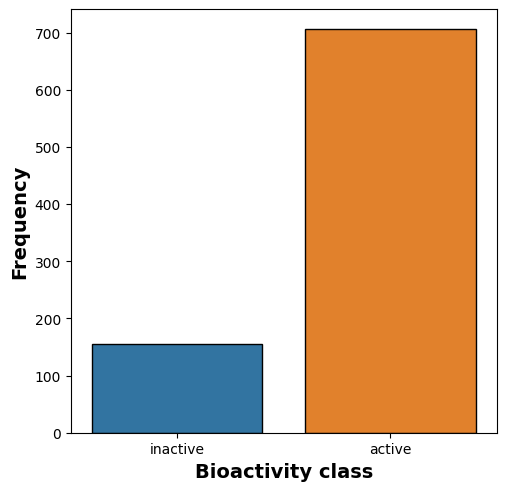

In [35]:
# show in countplot
plt.figure(figsize=(5.5, 5.5))
sns.countplot(x='class', data=df_2class, edgecolor='black')
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

#### Scatter plot of MW versus LogP
It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of **MW** vs **LogP**.

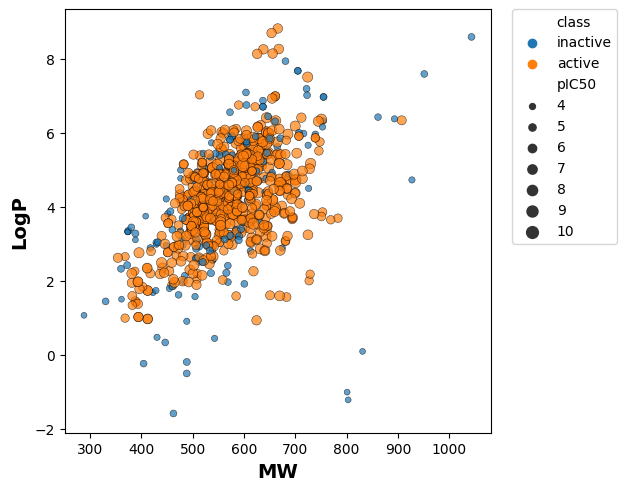

In [36]:
plt.figure(figsize=(5.5, 5.5))
sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)
plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

#### Box plots pIC50 value

Text(0, 0.5, 'pIC50 value')

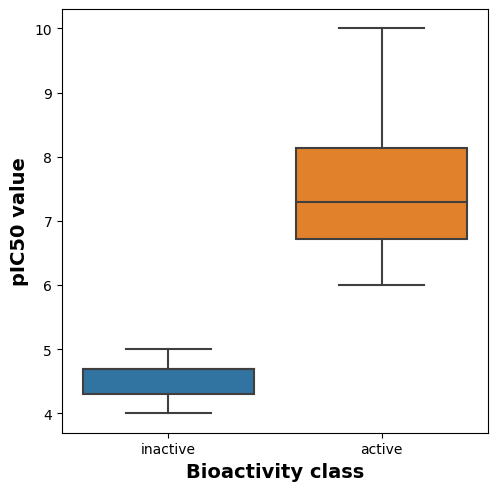

In [37]:

plt.figure(figsize=(5.5, 5.5))
sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

#### Statistical analysis | Mann-Whitney U Test

In [38]:
# https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/


from scipy.stats import mannwhitneyu

def mannwhitney(descriptor, verbose=False):
  # seed the random number generator
  np.random.seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [39]:
mannwhitney("pIC50")

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,110136.0,2.535471e-85,0.05,Different distribution (reject H0)


In [40]:
mannwhitney("NumHDonors")

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,60581.0,0.028077,0.05,Different distribution (reject H0)


In [41]:
mannwhitney("NumHAcceptors")

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,41373.5,7.228307e-07,0.05,Different distribution (reject H0)


Taking a look at pIC50 values, the actives and inactives displayed *statistically significant difference*, which is to be expected since threshold values (IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives, corresponding to pIC50 > 6 = Actives and pIC50 < 5 = Inactives) were used to define actives and inactives.

Lipinski's descriptors
All of the 4 Lipinski's descriptors exhibited *statistically significant difference* between the actives and inactives.

### Download PaDEL-Descriptor

In [42]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2023-07-13 08:49:46--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2023-07-13 08:49:47--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  --.-KB/s    in 0.09s   

2023-07-13 08:49:47 (286 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2023-07-13 08:49:47--  https://github

In [43]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

### Load bioactivity data
Using the the preprocessed pIC50 data.

In [44]:
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL2177756,O=C(CCCCc1nnc(NC(=O)Cc2ccccc2)s1)NCc1ccc(C(F)(...,inactive,476.524,4.7673,2.0,5.0,4.000000
1,CHEMBL2177755,CN(C)c1ccc(CNC(=O)CCCCc2nnc(NC(=O)Cc3ccccc3)s2...,inactive,451.596,3.8145,2.0,6.0,4.318759
2,CHEMBL2177754,O=C(CCCCc1nnc(NC(=O)Cc2ccccc2)s1)NCc1ccccc1,inactive,408.527,3.7485,2.0,5.0,4.000000
4,CHEMBL2177752,CC(C)(C)NC(=O)CCCCc1nnc(NC(=O)Cc2ccccc2)s1,inactive,374.510,3.3468,2.0,5.0,4.958607
5,CHEMBL2177751,CCN(CC)CCNC(=O)CCCCc1nnc(NC(=O)Cc2ccccc2)s1,inactive,417.579,2.8901,2.0,6.0,4.585027
...,...,...,...,...,...,...,...,...
1000,CHEMBL5207321,CO[C@@H](C(=O)Nc1nnc(NC2CCN(c3nnc(NC(=O)CCc4cn...,active,729.815,5.1684,3.0,14.0,8.314258
1001,CHEMBL5199798,CO[C@H](C(=O)Nc1nnc(NC2CCN(c3nnc(NC(=O)CCc4cn(...,active,727.799,5.0266,3.0,14.0,7.625435
1002,CHEMBL5178036,CO[C@H](C(=O)Nc1nnc(NC2CCN(c3nnc(NC(=O)CCc4cn(...,active,713.772,4.9675,3.0,14.0,7.715344
1003,CHEMBL5188536,O=C(Cc1ccccc1)Nc1nnc(NC2CCN(c3nnc(NC(=O)c4ccn(...,active,668.731,5.1676,3.0,12.0,7.759950


In [45]:
selection = ['canonical_smiles','molecule_chembl_id']
df_2class_selection = df_2class[selection]
df_2class_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [46]:
! cat molecule.smi | head -5

O=C(CCCCc1nnc(NC(=O)Cc2ccccc2)s1)NCc1ccc(C(F)(F)F)cc1	CHEMBL2177756
CN(C)c1ccc(CNC(=O)CCCCc2nnc(NC(=O)Cc3ccccc3)s2)cc1	CHEMBL2177755
O=C(CCCCc1nnc(NC(=O)Cc2ccccc2)s1)NCc1ccccc1	CHEMBL2177754
CC(C)(C)NC(=O)CCCCc1nnc(NC(=O)Cc2ccccc2)s1	CHEMBL2177752
CCN(CC)CCNC(=O)CCCCc1nnc(NC(=O)Cc2ccccc2)s1	CHEMBL2177751


In [47]:
! cat molecule.smi | wc -l

862


### Calculate fingerprint descriptors
#### Calculate PaDEL descriptors

In [48]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [49]:

! bash padel.sh


Processing CHEMBL2177756 in molecule.smi (1/862). 
Processing CHEMBL2177755 in molecule.smi (2/862). 
Processing CHEMBL2177754 in molecule.smi (3/862). Average speed: 3.71 s/mol.
Processing CHEMBL2177752 in molecule.smi (4/862). Average speed: 1.86 s/mol.
Processing CHEMBL2177751 in molecule.smi (5/862). Average speed: 1.41 s/mol.
Processing CHEMBL2177750 in molecule.smi (6/862). Average speed: 1.12 s/mol.
Processing CHEMBL2177747 in molecule.smi (7/862). Average speed: 0.95 s/mol.
Processing CHEMBL2177745 in molecule.smi (8/862). Average speed: 0.82 s/mol.
Processing CHEMBL2177742 in molecule.smi (10/862). Average speed: 0.78 s/mol.
Processing CHEMBL2177743 in molecule.smi (9/862). Average speed: 0.77 s/mol.
Processing CHEMBL2177741 in molecule.smi (11/862). Average speed: 0.58 s/mol.
Processing CHEMBL2177738 in molecule.smi (12/862). Average speed: 0.59 s/mol.
Processing CHEMBL2178397 in molecule.smi (13/862). Average speed: 0.56 s/mol.
Processing CHEMBL2178395 in molecule.smi (14/86

In [50]:

! ls -l

total 26904
drwxr-xr-x 2 root root     4096 Jul 13 08:49 data
-rw-r--r-- 1 root root  1543984 Jul 13 08:52 descriptors_output.csv
-rw-r--r-- 1 root root   130772 Jul 13 08:49 kidney_bioactivity_data_2class_pIC50.csv
drwxr-xr-x 3 root root     4096 Jul 13 08:49 __MACOSX
-rw-r--r-- 1 root root      132 Jul 13 08:49 mannwhitneyu_NumHAcceptors.csv
-rw-r--r-- 1 root root      128 Jul 13 08:49 mannwhitneyu_NumHDonors.csv
-rw-r--r-- 1 root root      126 Jul 13 08:49 mannwhitneyu_pIC50.csv
-rw-r--r-- 1 root root    69189 Jul 13 08:49 molecule.smi
drwxrwxr-x 4 root root     4096 May 30  2020 PaDEL-Descriptor
-rw-r--r-- 1 root root      231 Jul 13 08:49 padel.sh
-rw-r--r-- 1 root root 25768637 Jul 13 08:49 padel.zip
drwxr-xr-x 1 root root     4096 Jul 11 13:35 sample_data


### Preparing the X and Y Data Matrices

In [51]:
# X data matrix
df3_X = pd.read_csv('descriptors_output.csv')

In [52]:

df3_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL2177756,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL2177755,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL2177752,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL2177754,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL2177751,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,CHEMBL5207321,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
858,CHEMBL5199798,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
859,CHEMBL5178036,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,CHEMBL5188536,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df3_X = df3_X.drop(columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
858,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
859,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
860,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Y variable
#### Convert IC50 to pIC50

In [65]:

df3_Y = df_2class["pIC50"]
df3_Y

0       4.000000
1       4.318759
2       4.000000
4       4.958607
5       4.585027
          ...   
1000    8.314258
1001    7.625435
1002    7.715344
1003    7.759950
1004    7.925915
Name: pIC50, Length: 862, dtype: float64

### Combining X and Y variable

In [66]:
dataset = pd.concat([df3_X,df3_Y], axis=1)
dataset


,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.318759
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.958607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.314258
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.625435
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.715344
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.759950


In [68]:
dataset2 = dataset.dropna()
dataset2

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.318759
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.958607
5,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.585027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.408935
858,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.136677
859,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.136677
860,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.795880


In [69]:
dataset2.to_csv("kidney_bioactivity_data_3class_pIC50_pubchem_fp.csv", index=False)

## 5. Comparing Machine Learning Regressors Usin LazyPredict

##### LazyPredict is a Python library that simplifies the process of model selection and evaluation by automatically running and comparing multiple machine-learning models with minimal code. It saves time by providing a quick overview of model performance without the need to individually fit and evaluate each model separately

#### Import libraries

In [71]:
# install lazypredict
! pip install lazypredict

In [80]:
# import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
import lazypredict
from lazypredict.Supervised import LazyRegressor

### Data Splitting

In [77]:
# split data into X and y.
X = dataset2.drop("pIC50", axis=1)
y = dataset2["pIC50"]

In [78]:
X.shape

(733, 881)

In [79]:
y.shape

(733,)

### Transforming the data

In [81]:
# Remove low variance features
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape

(733, 99)

In [82]:
y.shape

(733,)

In [83]:
# Perform data splitting using ratio 80:20
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [84]:

# Defines and builds the lazyclassifiers
classifier = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train, predictions_train = classifier.fit(X_train, X_train, Y_train, Y_train)
models_test, predictions_test = classifier.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:14<00:00,  2.93it/s]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:13<00:00,  3.20it/s]


In [85]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.81,0.84,0.52,0.08
ExtraTreeRegressor,0.81,0.84,0.52,0.07
ExtraTreesRegressor,0.81,0.84,0.52,0.70
GaussianProcessRegressor,0.81,0.84,0.52,0.13
XGBRegressor,0.81,0.84,0.53,0.25
RandomForestRegressor,0.75,0.79,0.60,0.43
BaggingRegressor,0.72,0.77,0.63,0.12
HistGradientBoostingRegressor,0.63,0.69,0.73,0.31
LGBMRegressor,0.62,0.68,0.74,0.09


In [100]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,-0.99,0.36,1.17,0.43
HistGradientBoostingRegressor,-1.03,0.35,1.18,0.33
LGBMRegressor,-1.04,0.34,1.18,0.05
NuSVR,-1.04,0.34,1.18,0.04
MLPRegressor,-1.05,0.34,1.18,0.60
GradientBoostingRegressor,-1.05,0.34,1.18,0.22
PoissonRegressor,-1.11,0.32,1.20,0.30
RidgeCV,-1.12,0.32,1.20,0.02
SGDRegressor,-1.12,0.32,1.20,0.02


### Visualizing the performance of the models.

[(0.0, 1.0)]

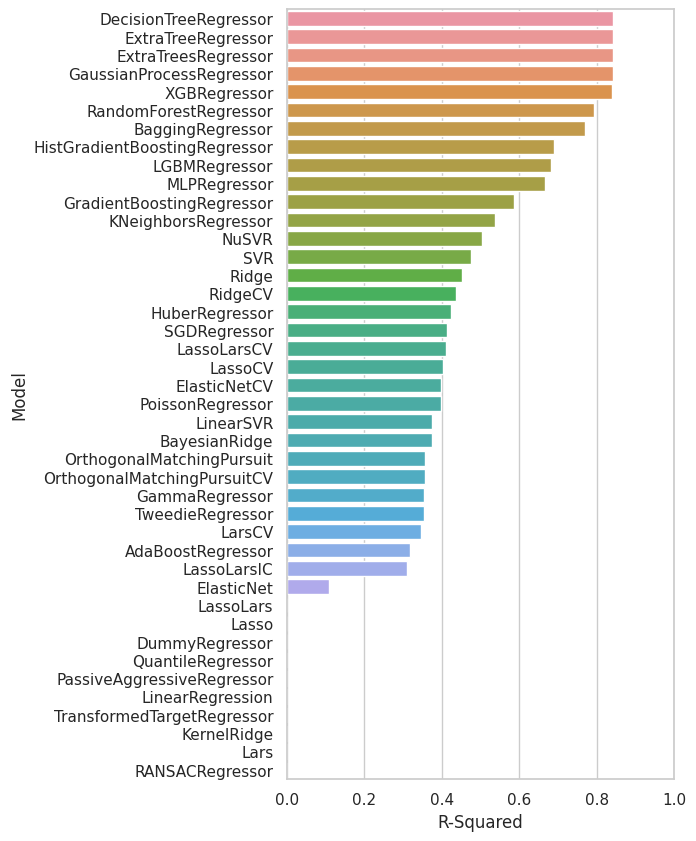

In [98]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

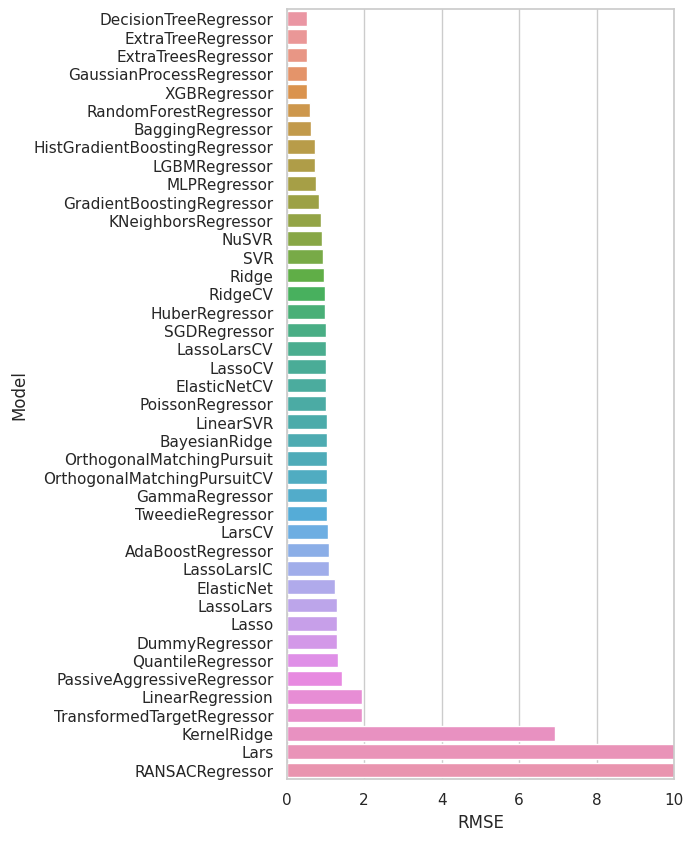

In [99]:
# Bar plot of RMSE values
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

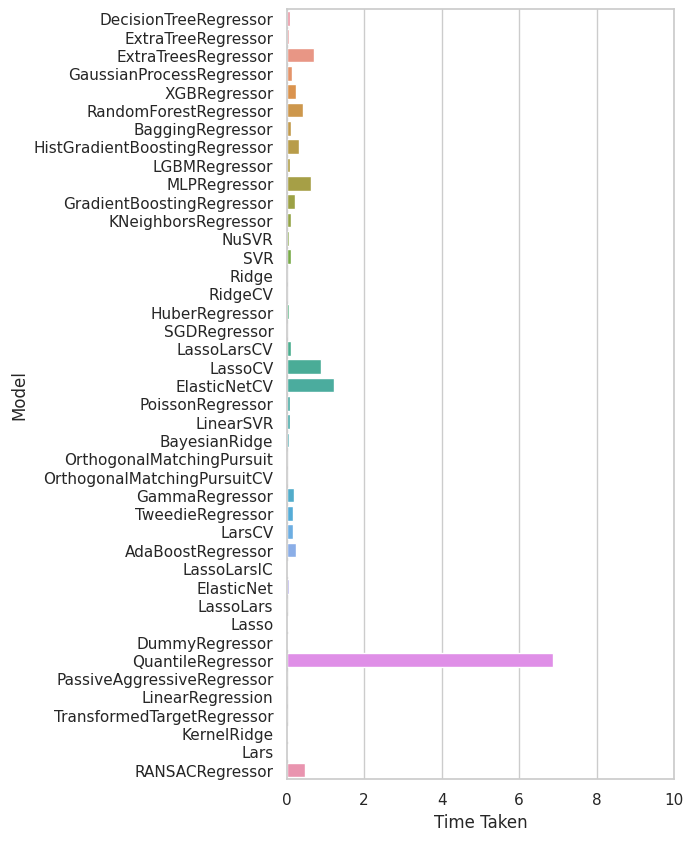

In [101]:
# Bar plot of calculation time
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))